### Load the necessary libraries

In [22]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### Load the dataset

In [85]:
df = pd.read_csv('/kaggle/input/food-delivery-dataset/train.csv')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [74]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


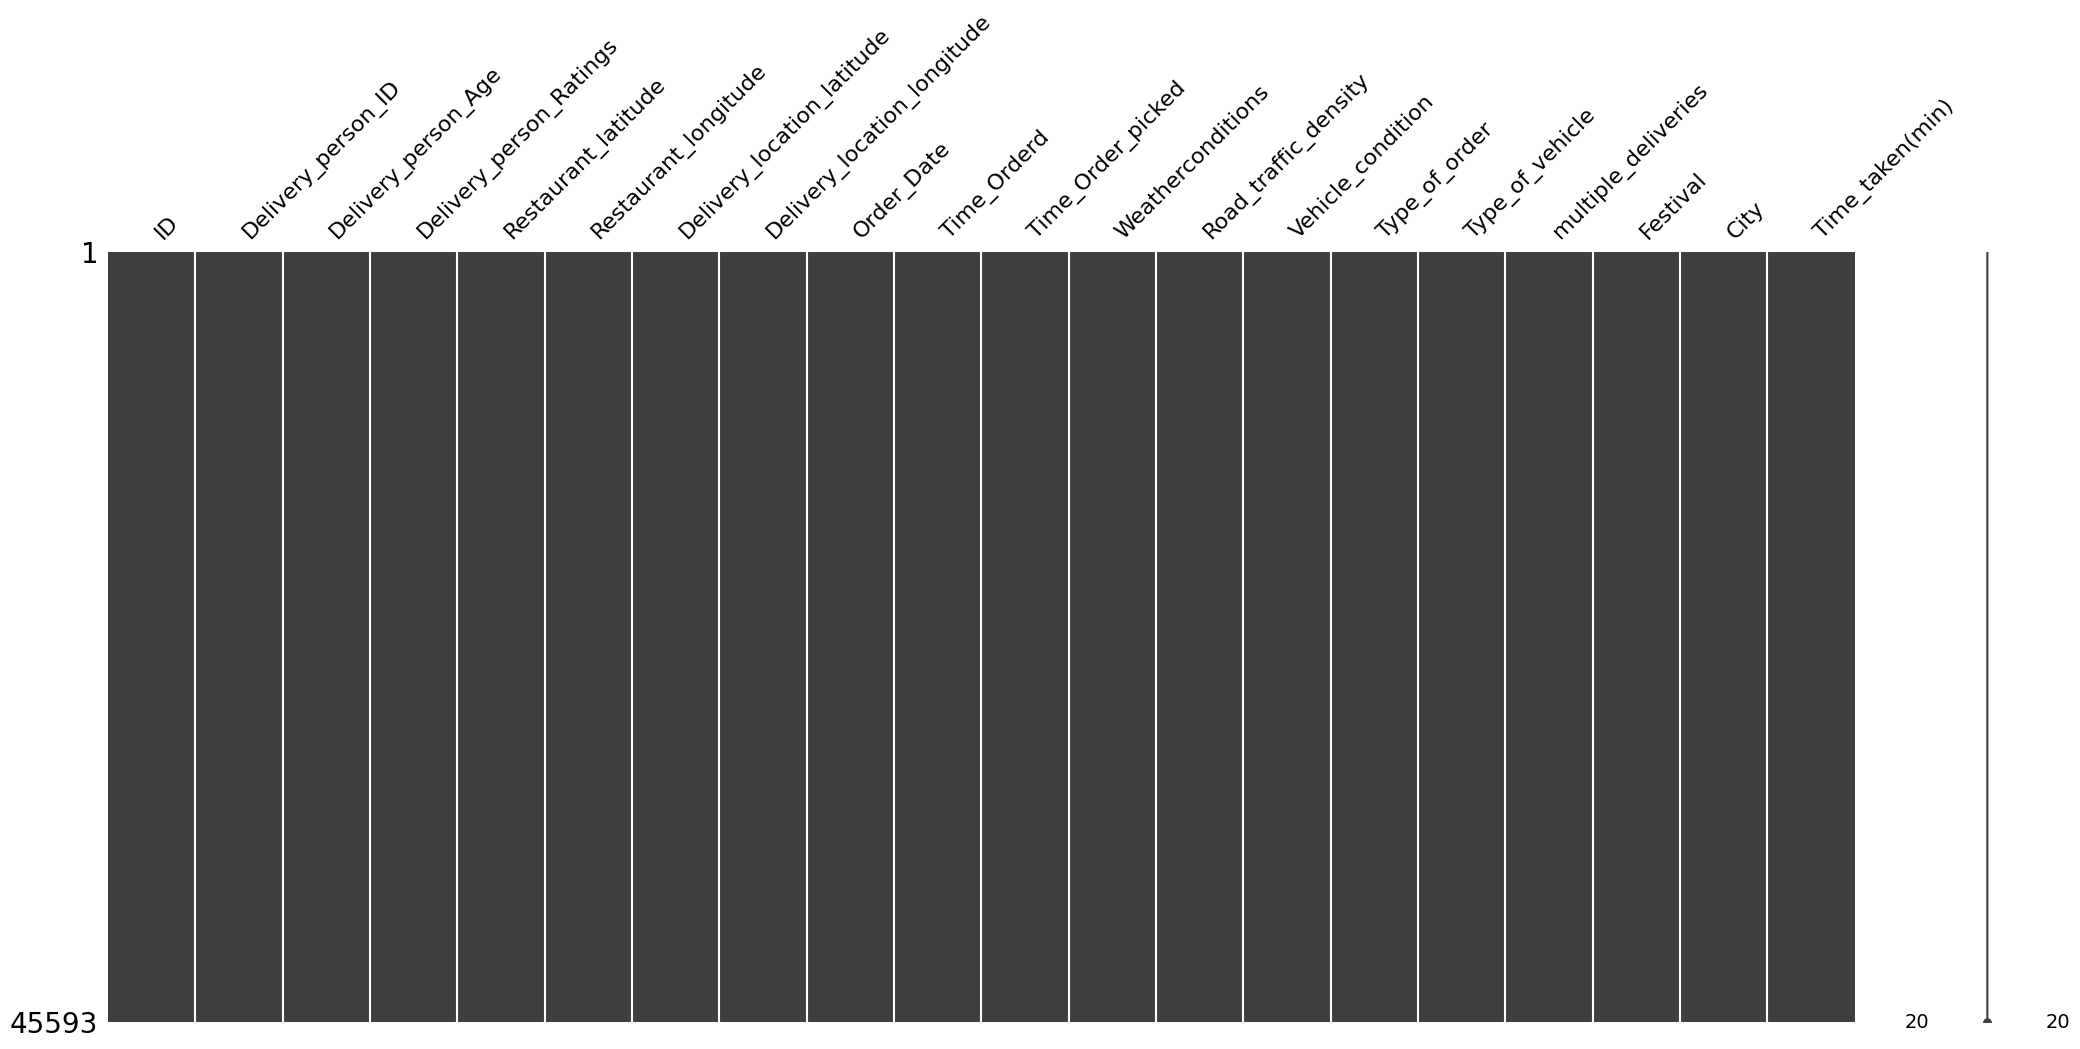

In [60]:
# Plotting missing values as a heatmap
msno.matrix(df)
plt.show()

In [61]:
df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [75]:
df.describe(exclude=np.number).T

,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


In [86]:
df.replace('NaN', np.nan,regex=True,inplace=True)


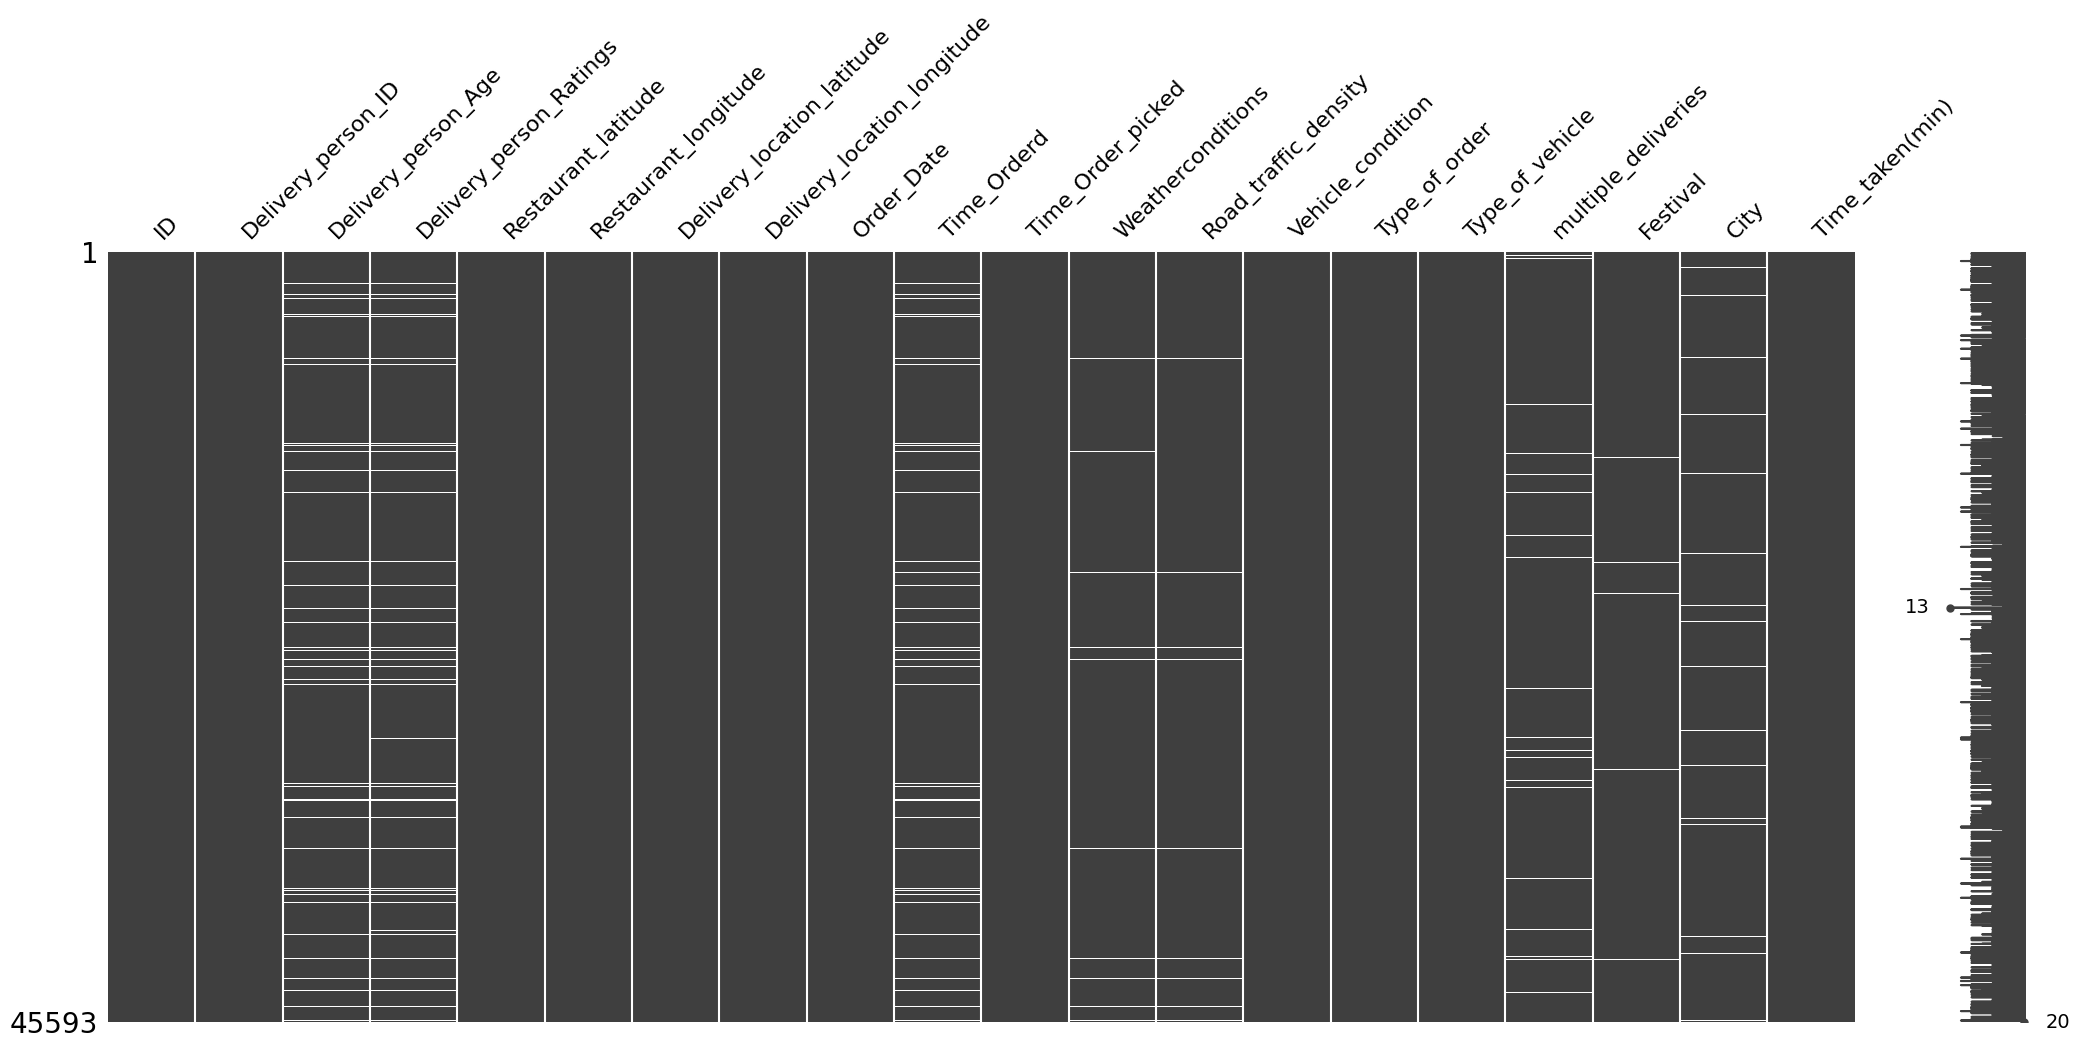

In [87]:
msno.matrix(df)
plt.show()

In [88]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [89]:
# Calculate missing data count and percentage
missing_data_count = df.isnull().sum()
missing_data_percentage = (df.isnull().sum() / len(df)) * 100

# Create a new DataFrame to display the results
missing_data_info = pd.DataFrame({
    'Missing Count': missing_data_count,
    'Missing Percentage': missing_data_percentage
})

# Sort the DataFrame by missing percentage in descending order
missing_data_info = missing_data_info.sort_values(by='Missing Percentage', ascending=False)

# Display the missing data information
print(missing_data_info)


                             Missing Count  Missing Percentage
Delivery_person_Ratings               1908            4.184853
Delivery_person_Age                   1854            4.066414
Time_Orderd                           1731            3.796635
City                                  1200            2.631983
multiple_deliveries                    993            2.177966
Weatherconditions                      616            1.351085
Road_traffic_density                   601            1.318185
Festival                               228            0.500077
ID                                       0            0.000000
Type_of_vehicle                          0            0.000000
Type_of_order                            0            0.000000
Vehicle_condition                        0            0.000000
Time_Order_picked                        0            0.000000
Delivery_person_ID                       0            0.000000
Order_Date                               0            0

In [67]:
df.nunique()


ID                             45593
Delivery_person_ID              1320
Delivery_person_Age               22
Delivery_person_Ratings           28
Restaurant_latitude              657
Restaurant_longitude             518
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Order_Date                        44
Time_Orderd                      176
Time_Order_picked                193
Weatherconditions                  6
Road_traffic_density               4
Vehicle_condition                  4
Type_of_order                      4
Type_of_vehicle                    4
multiple_deliveries                4
Festival                           2
City                               3
Time_taken(min)                   45
dtype: int64

### Dataset cleaning to do list:
* convert delivery person age,ratings,multiple deliveries to float
* extract city name from delivery person id
* convert order date, time oredered, time picked to date time
* extract other date time features from them
* extract time taken into int after splitting string


In [90]:
def dtype_update(df):
    df['Delivery_person_Age']=df['Delivery_person_Age'].astype('float64')
    df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].astype('float64')
    df['multiple_deliveries']=df['multiple_deliveries'].astype('float64')
    df['Order_Date']=pd.to_datetime(df['Order_Date'])
    df['Time_Orderd']=pd.to_datetime(df['Time_Orderd'])
    df['Time_Order_picked']=pd.to_datetime(df['Time_Order_picked'])
    

In [91]:
dtype_update(df)

/tmp/ipykernel_33/3531902915.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order_Date']=pd.to_datetime(df['Order_Date'])
/tmp/ipykernel_33/3531902915.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_Orderd']=pd.to_datetime(df['Time_Orderd'])
/tmp/ipykernel_33/3531902915.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_Order_picked']=pd.to_datetime(df['Time_Order_picked'])


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          43739 non-null  float64       
 3   Delivery_person_Ratings      43685 non-null  float64       
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  43862 non-null  datetime64[ns]
 10  Time_Order_picked            45593 non-null  datetime64[ns]
 11  Weatherconditions            44977 non-nu

In [93]:
def extract_features(df):
    #extract city code from delivery person id
    df['City_code']=df['Delivery_person_ID'].apply(lambda x: x.split('RES')[0].strip())
    #split string and convert the first term to int
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))
    #just take the second word from weather conditions which is relevant
    df['Weatherconditions']=df['Weatherconditions'].apply(lambda x: x.split(' ')[1].strip() if isinstance(x, str) else x)


In [94]:
extract_features(df)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          43739 non-null  float64       
 3   Delivery_person_Ratings      43685 non-null  float64       
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  43862 non-null  datetime64[ns]
 10  Time_Order_picked            45593 non-null  datetime64[ns]
 11  Weatherconditions            44977 non-nu

In [96]:
#Drop Columns which won't be use for building model
def drop_columns(df):
    df.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)

drop_columns(df)

In [97]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2024-02-28 11:30:00,2024-02-28 11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2024-02-28 19:45:00,2024-02-28 19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2024-02-28 08:30:00,2024-02-28 08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2024-02-28 18:00:00,2024-02-28 18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2024-02-28 13:30:00,2024-02-28 13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN


In [98]:
df.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weatherconditions               616
Road_traffic_density            601
Festival                        228
Order_Date                        0
Delivery_location_longitude       0
Time_Order_picked                 0
Delivery_location_latitude        0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Restaurant_longitude              0
Restaurant_latitude               0
Time_taken(min)                   0
City_code                         0
dtype: int64

In [99]:
columns_with_null = df.columns[df.isnull().any()].tolist()
columns_with_null

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Time_Orderd',
 'Weatherconditions',
 'Road_traffic_density',
 'multiple_deliveries',
 'Festival',
 'City']

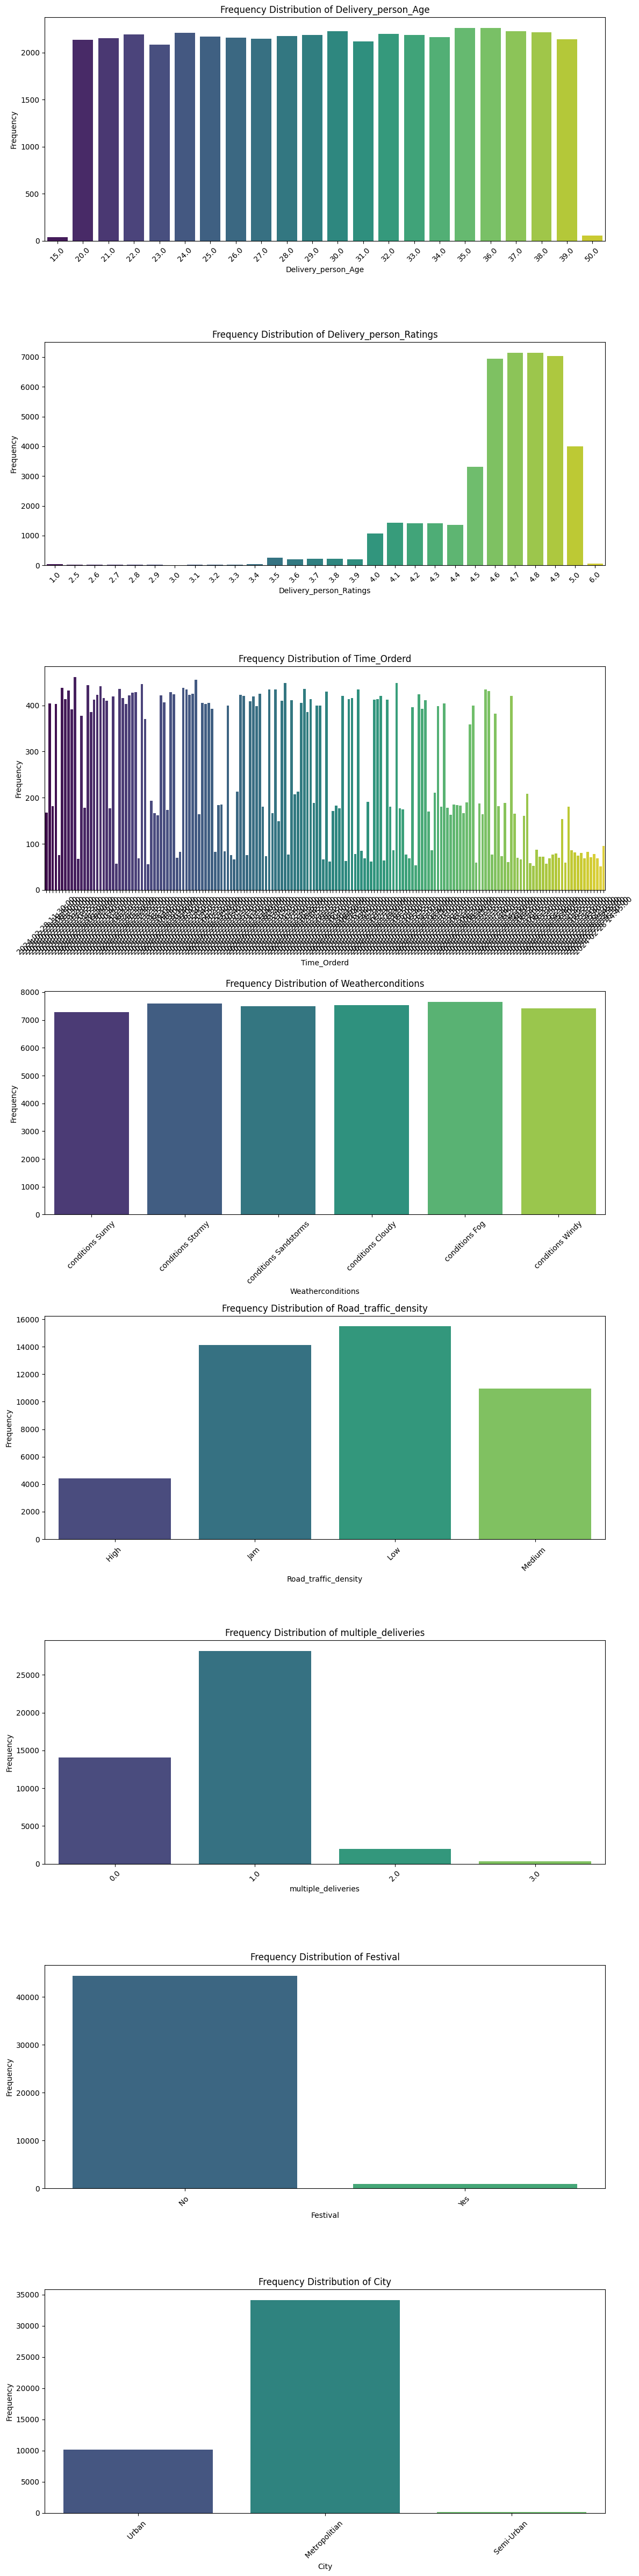

In [23]:
columns=columns_with_null
plt.figure(figsize=(12, 6*len(columns)))

for i, column in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)
    sns.countplot(data=df, x=column, palette='viridis')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Frequency Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [100]:
def fill_null(df):
    df['Delivery_person_Age'] = df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age']))
    df['Weatherconditions'] = df['Weatherconditions'].fillna(np.random.choice(df['Weatherconditions']))
    df['City'] = df['City'].fillna(df['City'].mode()[0])
    df['Festival'] = df['Festival'].fillna(df['Festival'].mode()[0])
    df['multiple_deliveries'] = df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0])
    df['Road_traffic_density'] = df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0])
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median())
    mean_time_diff = (df['Time_Order_picked'] - df['Time_Orderd']).mean()
    df['Time_Orderd'] = df.apply(lambda x: x['Time_Order_picked'] - mean_time_diff if pd.isnull(x['Time_Orderd']) else x['Time_Orderd'], axis=1)




In [101]:
fill_null(df)

In [26]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2024-02-28 11:30:00,2024-02-28 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,(min) 24
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2024-02-28 19:45:00,2024-02-28 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,(min) 33
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2024-02-28 08:30:00,2024-02-28 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,(min) 26
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2024-02-28 18:00:00,2024-02-28 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 21
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2024-02-28 13:30:00,2024-02-28 13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,(min) 30


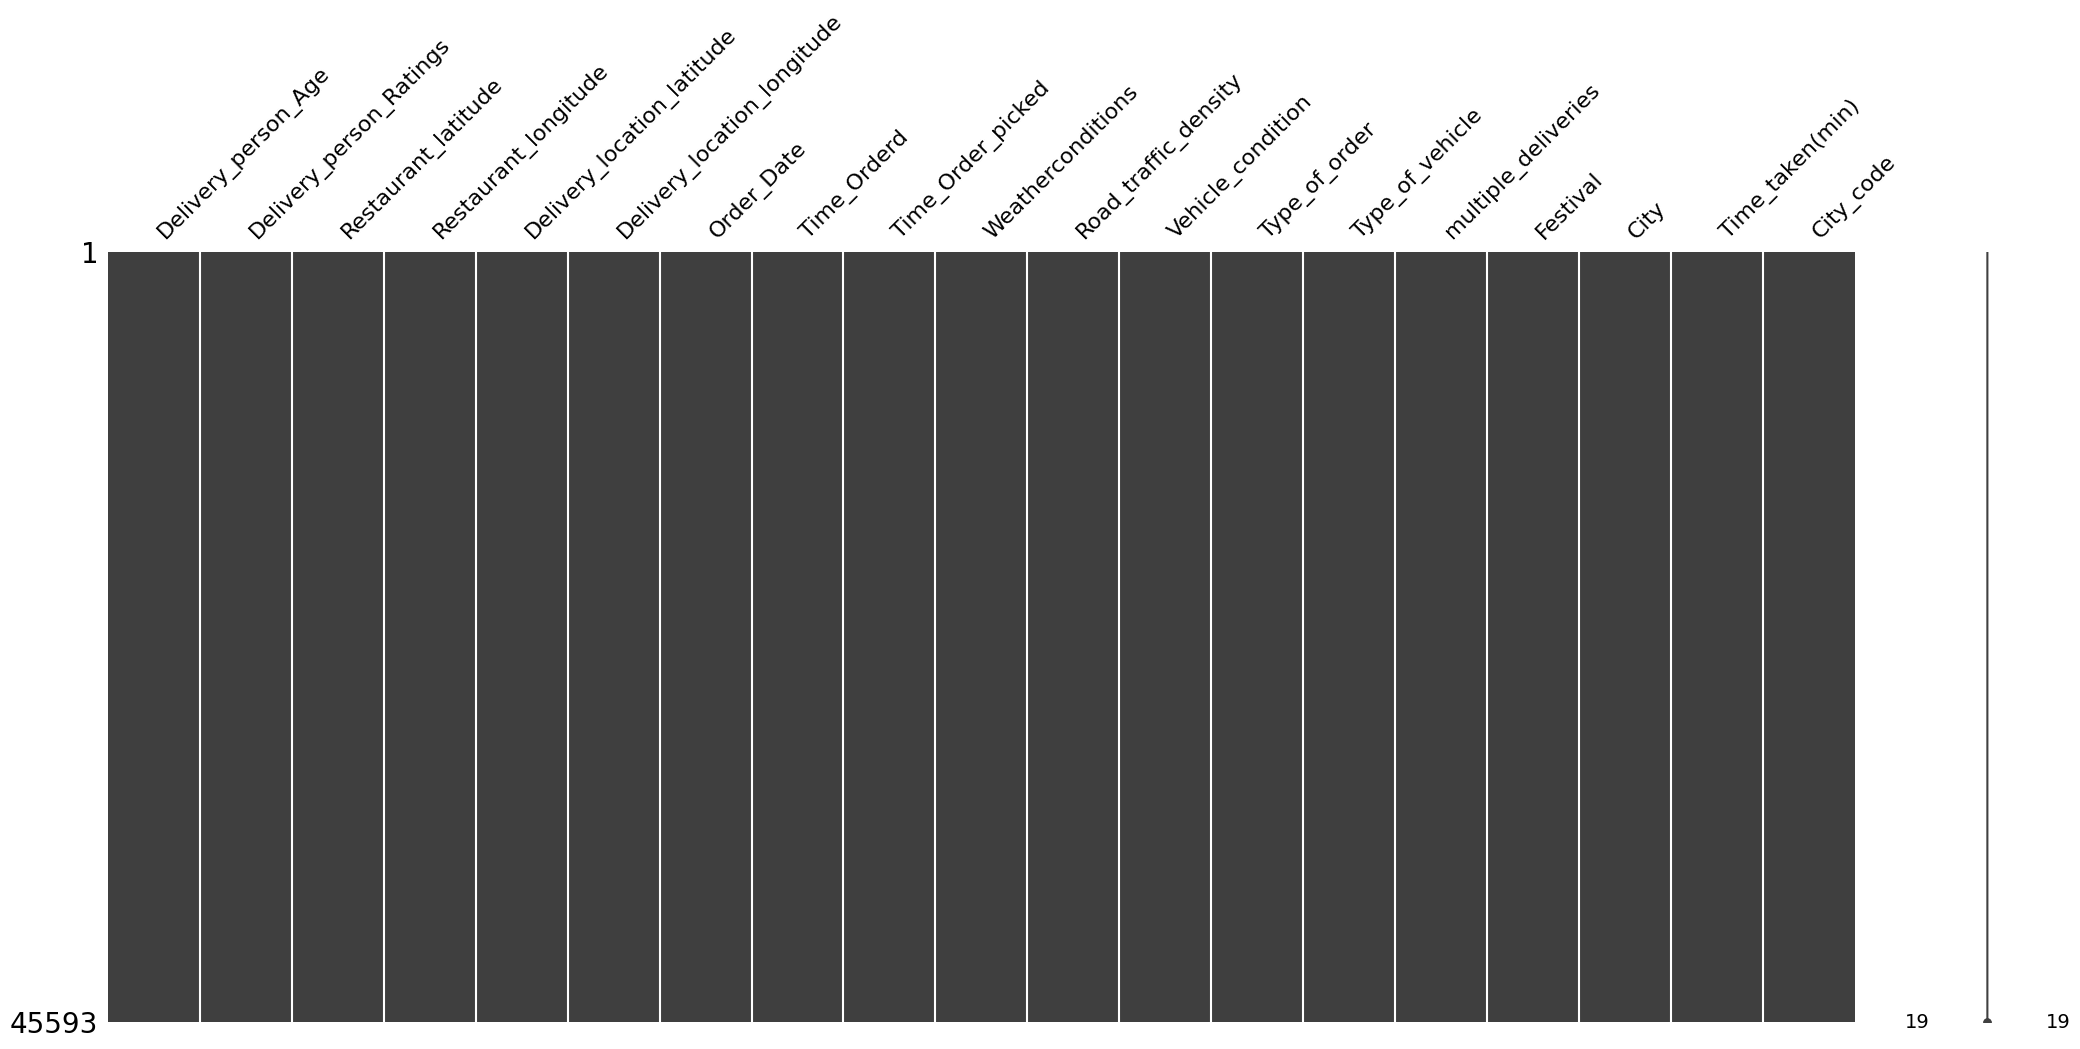

In [102]:
msno.matrix(df)
plt.show()

In [103]:
### Extracting new features from date time columns


def extract_date_features(data):
    data["day"] = data.Order_Date.dt.day
    data["month"] = data.Order_Date.dt.month
    data["quarter"] = data.Order_Date.dt.quarter
    data["year"] = data.Order_Date.dt.year
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)
    data["is_quarter_start"] = data.Order_Date.dt.is_quarter_start.astype(int)
    data["is_quarter_end"] = data.Order_Date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.Order_Date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.Order_Date.dt.is_year_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)


In [104]:
extract_date_features(df)

In [105]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2024-02-28 11:30:00,2024-02-28 11:45:00,Sunny,...,1,2022,5,0,0,0,0,0,0,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2024-02-28 19:45:00,2024-02-28 19:50:00,Stormy,...,1,2022,4,0,0,0,0,0,0,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2024-02-28 08:30:00,2024-02-28 08:45:00,Sandstorms,...,1,2022,5,0,0,0,0,0,0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2024-02-28 18:00:00,2024-02-28 18:10:00,Sunny,...,2,2022,1,0,0,0,0,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2024-02-28 13:30:00,2024-02-28 13:45:00,Cloudy,...,1,2022,5,0,0,0,0,0,0,1


In [106]:
def time_difference(df):
    df['Prep_time']=(df['Time_Order_picked'] - df['Time_Orderd']).dt.seconds / 60


In [108]:
time_difference(df)


In [109]:
df.drop(['Time_Orderd', 'Time_Order_picked','Order_Date'], axis=1, inplace=True)


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  float64
 1   Delivery_person_Ratings      45593 non-null  float64
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Weatherconditions            45593 non-null  object 
 7   Road_traffic_density         45593 non-null  object 
 8   Vehicle_condition            45593 non-null  int64  
 9   Type_of_order                45593 non-null  object 
 10  Type_of_vehicle              45593 non-null  object 
 11  multiple_deliveries          45593 non-null  float64
 12  Festival                     45593 non-null  object 
 13  City            

In [111]:
### Calculate distance between restaurant and customer

from geopy.distance import geodesic


def calculate_distance(df):
    restaurant_coordinates = df[['Restaurant_latitude', 'Restaurant_longitude']]
    delivery_location_coordinates = df[['Delivery_location_latitude', 'Delivery_location_longitude']]
    df['distance'] = [geodesic(restaurant, delivery).meters for restaurant, delivery in zip(restaurant_coordinates.values, delivery_location_coordinates.values)]



In [113]:
calculate_distance(df)


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  float64
 1   Delivery_person_Ratings      45593 non-null  float64
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Weatherconditions            45593 non-null  object 
 7   Road_traffic_density         45593 non-null  object 
 8   Vehicle_condition            45593 non-null  int64  
 9   Type_of_order                45593 non-null  object 
 10  Type_of_vehicle              45593 non-null  object 
 11  multiple_deliveries          45593 non-null  float64
 12  Festival                     45593 non-null  object 
 13  City            

In [115]:
X=df.drop('Time_taken(min)',axis=1)
y=df['Time_taken(min)']

X.shape,y.shape

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(include=['int', 'float']).columns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Create a pipeline for preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

pipeline.fit(X_train)

# Transform the training and test data
X_train_processed = pipeline.transform(X_train)
X_test_processed = pipeline.transform(X_test)


(36474, 29)
(36474,)
(9119, 29)
(9119,)


### Building models


In [116]:
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train_processed,y_train)

y_pred_lr = lr.predict(X_test_processed)

r2_lr = r2_score(y_test, y_pred_lr)

r2_lr

0.556047567618331

In [117]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train_processed, y_train)
y_pred_dt = dt.predict(X_test_processed)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree R-squared:", r2_dt)


Decision Tree R-squared: 0.6461717311084731


In [118]:
param_grid_dt = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid_dt, cv=5, scoring='r2')
grid_search.fit(X_train_processed, y_train)
dt_best = grid_search.best_estimator_
y_pred_dt_best = dt_best.predict(X_test_processed)
r2_dt_best = r2_score(y_test, y_pred_dt_best)
print("Improved Decision Tree R-squared:", r2_dt_best)

Improved Decision Tree R-squared: 0.7966948713696258


In [119]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train_processed, y_train)
y_pred_rf = rf.predict(X_test_processed)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest R-squared:", r2_rf)

Random Forest R-squared: 0.8094159475692384


In [134]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=0), param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train_processed, y_train)
rf_best = grid_search_rf.best_estimator_
y_pred_rf_best = rf_best.predict(X_test_processed)
r2_rf_best = r2_score(y_test, y_pred_rf_best)
print("Improved Random Forest R-squared:", r2_rf_best)


Improved Random Forest R-squared: 0.815270600605313


In [123]:
ridge = Ridge(alpha=1.0, random_state=0)
ridge.fit(X_train_processed, y_train)
y_pred_ridge = ridge.predict(X_test_processed)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression R-squared:", r2_ridge)

Ridge Regression R-squared: 0.5560567227074962


In [124]:
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0]
}
grid_search_ridge = GridSearchCV(Ridge(random_state=0), param_grid_ridge, cv=5, scoring='r2')
grid_search_ridge.fit(X_train_processed, y_train)
ridge_best = grid_search_ridge.best_estimator_
y_pred_ridge_best = ridge_best.predict(X_test_processed)
r2_ridge_best = r2_score(y_test, y_pred_ridge_best)
print("Improved Ridge Regression R-squared:", r2_ridge_best)


Improved Ridge Regression R-squared: 0.5561035204198109


In [125]:
param_grid_lasso = {
    'alpha': [0.1, 1.0, 10.0]
}
grid_search_lasso = GridSearchCV(Lasso(random_state=0), param_grid_lasso, cv=5, scoring='r2')
grid_search_lasso.fit(X_train_processed, y_train)
lasso_best = grid_search_lasso.best_estimator_
y_pred_lasso_best = lasso_best.predict(X_test_processed)
r2_lasso_best = r2_score(y_test, y_pred_lasso_best)
print("Improved Lasso Regression R-squared:", r2_lasso_best)

Improved Lasso Regression R-squared: 0.5428212025115909


In [133]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search_xgb = GridSearchCV(XGBRegressor(random_state=0), param_grid_xgb, cv=5, scoring='r2')
grid_search_xgb.fit(X_train_processed, y_train)
xgb_best = grid_search_xgb.best_estimator_
y_pred_xgb_best = xgb_best.predict(X_test_processed)
r2_xgb_best = r2_score(y_test, y_pred_xgb_best)
print("Improved XGBoost R-squared:", r2_xgb_best)


Improved XGBoost R-squared: 0.8175235702207211


In [135]:
from joblib import dump


In [136]:

dump(xgb_best, 'best_xgb_model.joblib')

['best_xgb_model.joblib']

In [137]:
dump(rf_best, 'best_rf_model.joblib')
dump(dt_best, 'best_dt_model.joblib')


['best_dt_model.joblib']

In [138]:
np.savetxt('X_train_processed.csv', X_train_processed, delimiter=',')
np.savetxt('X_test_processed.csv', X_test_processed, delimiter=',')

In [139]:
np.savetxt('y_train.csv', y_train, delimiter=',')
np.savetxt('y_test.csv', y_test, delimiter=',')